In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
pwd

u'/Users/cosmology/radiometer/notebooks'

In [3]:
fdir = '/Users/cosmology/radiometer/ReadoutApp/observation/'

In [4]:
import glob

In [5]:
fnames = glob.glob(fdir+'*.txt')

In [6]:
fnames

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_13:54:43test.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_13:56:19.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_13:57:26.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_13:58:18.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_13:59:17.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_13:59:59.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:00:44.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:01:40.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:02:23.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:03:11.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:03:55.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:04:35.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observa

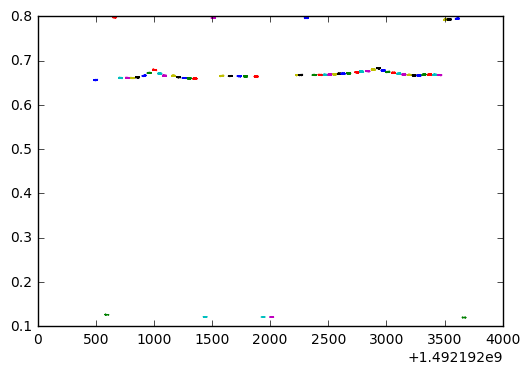

In [13]:
for f in fnames[:-18]:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [14]:
fnames13v = fnames[-18:]
fnames = fnames[:-18]

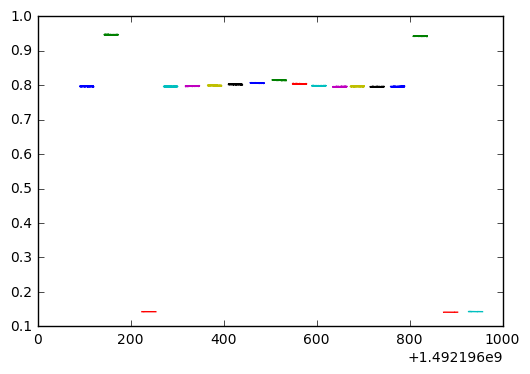

In [15]:
for f in fnames13v:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [17]:
nitrofiles = []
datafiles = []
paddlefiles = []
for f in fnames13v:
    x = np.loadtxt(f)
    avg = np.mean(x[:,1])
    if avg < 0.2:
        paddlefiles.append(f)
    elif avg < 0.9:
        datafiles.append(f)
    else:
        nitrofiles.append(f)

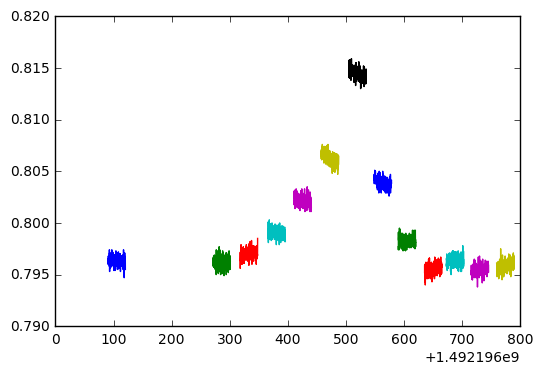

In [20]:
for f in datafiles:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [22]:
x = np.loadtxt(f)

In [27]:
fl = open(f)

In [37]:
fl.readline()

'# Comments: 13 V\n'

In [42]:
fl.close()

In [48]:
f

'/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_15:05:59_Readout.txt'

In [56]:
angles = []
for f in datafiles:
    fl = open(f)
    for k in range(8):
        fl.readline()
        if k == 2:
            print fl.readline()

# Angle pointing (from vertical): 0

# Angle pointing (from vertical): 10

# Angle pointing (from vertical): 20

# Angle pointing (from vertical): 30

# Angle pointing (from vertical): 40

# Angle pointing (from vertical): 50

# Angle pointing (from vertical): 60

# Angle pointing (from vertical): 50

# Angle pointing (from vertical): 40

# Angle pointing (from vertical): 30

# Angle pointing (from vertical): 20

# Angle pointing (from vertical): 10

# Angle pointing (from vertical): 0



In [59]:
angles = np.arange(7) * 10

In [63]:
angles[5::-1]

array([50, 40, 30, 20, 10,  0])

In [64]:
angles = np.concatenate([angles, angles[5::-1]])

In [65]:
angles

array([ 0, 10, 20, 30, 40, 50, 60, 50, 40, 30, 20, 10,  0])

In [66]:
meandatas = []
for f in datafiles:
    x = np.loadtxt(f)
    meandatas.append(np.mean(x[:,1]))

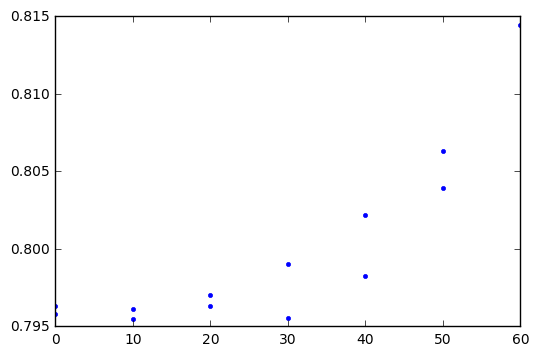

In [68]:
plot(angles, meandatas, '.')

In [69]:
angles = angles[:6]
meandatas = meandatas[:6]

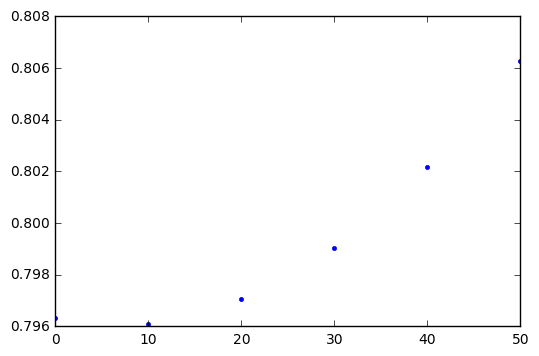

In [70]:
plot(angles, meandatas, '.')

In [72]:
radangles = angles * np.pi / 180.

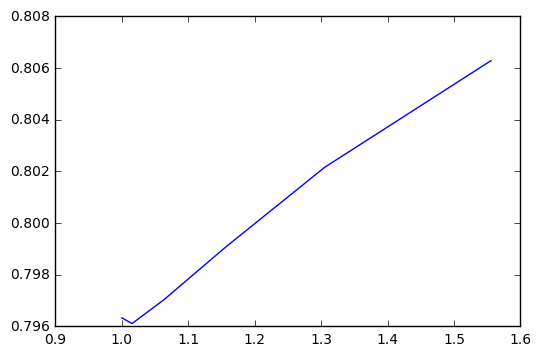

In [74]:
plot(1./np.cos(radangles), meandatas)

In [75]:
def line(x, m, b):
    return m*x + b

In [76]:
from scipy.optimize import curve_fit

In [78]:
x = 1./np.cos(radangles)
y = np.array(meandatas) + 0.0

In [79]:
popt = curve_fit(line, x, y)

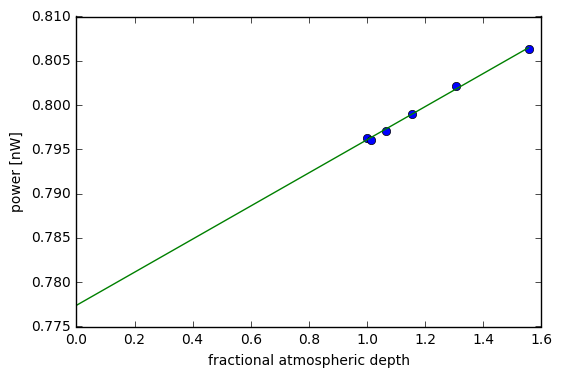

In [93]:
plot(x, y, 'o')
plot(xp, line(xp, *popt[0]))
xlabel('fractional atmospheric depth')
ylabel('power [nW]')

In [94]:
cmbpower = popt[0][1]

In [96]:
print cmbpower #nanoWatts

0.777387165648


In [142]:
popt[1]

array([[  1.07350658e-09,  -2.22515463e-07],
       [ -2.22515463e-07,   5.82324717e-05]])

In [84]:
popt[0]

array([ 0.01869711,  0.77738717])

In [87]:
x

array([ 1.        ,  1.01542661,  1.06417777,  1.15470054,  1.30540729,
        1.55572383])

In [91]:
xp = np.concatenate([np.zeros(1), x])

In [92]:
xp

array([ 0.        ,  1.        ,  1.01542661,  1.06417777,  1.15470054,
        1.30540729,  1.55572383])

In [97]:
paddlefiles

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:57:04_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_15:07:53_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_15:08:46_Readout.txt']

In [98]:
nitrofiles

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:55:43_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_15:06:47_Readout.txt']

In [101]:
nitropower = []
for f in nitrofiles:
    x = np.loadtxt(f)
    nitropower.append(np.mean(x[:,1]))

In [102]:
nitropower

[0.94649763513513507, 0.94231481481481483]

In [109]:
paddlepower = []
paddletemps = []
for f in paddlefiles:
    x = np.loadtxt(f)
    paddlepower.append(np.mean(x[:,1])*10)
    paddletemps.append(np.mean(x[:,2]))

In [110]:
paddlepower

[1.4233682432432433, 1.4082398648648651, 1.4263648648648646]

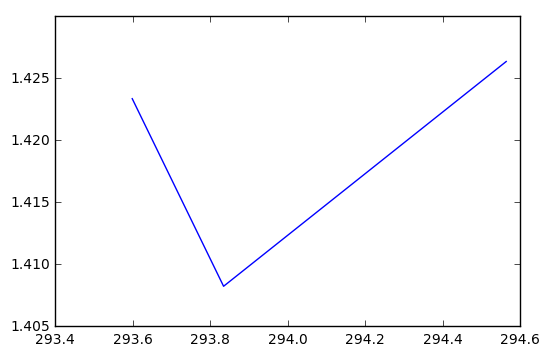

In [111]:
plot(paddletemps, paddlepower)

In [115]:
nitrotemps = [77.2, 77.2]

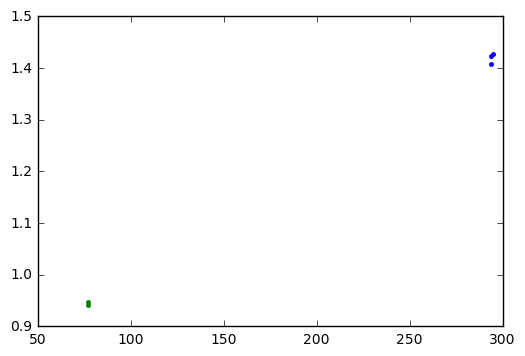

In [116]:
plot(paddletemps, paddlepower, '.')
plot(nitrotemps, nitropower, '.')

In [119]:
xc = np.concatenate([nitrotemps, paddletemps])

In [120]:
yc = np.concatenate([nitropower, paddlepower])

In [130]:
popt2 = curve_fit(line, yc, xc)

In [131]:
popt2

(array([ 456.17907447, -353.5278892 ]), array([[ 46.55098235, -57.22777979],
        [-57.22777979,  72.87508189]]))

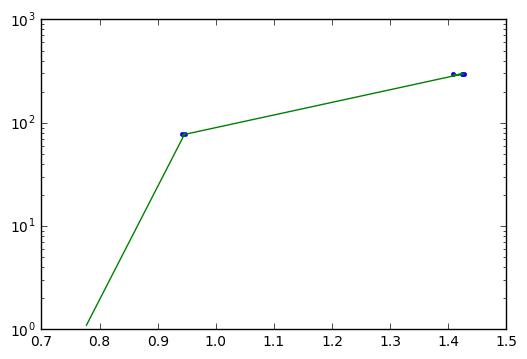

In [140]:
plot(yc, xc, '.')
plot(yc2, line(yc2, *popt2[0]))
yscale('log')

In [134]:
line(cmbpower, *popt2[0])

1.0998685308462655

In [135]:
cmbpower

0.77738716564799792

In [137]:
yc2 = np.concatenate([np.ones(1)*cmbpower, yc])

In [138]:
yc2

array([ 0.77738717,  0.94649764,  0.94231481,  1.42336824,  1.40823986,
        1.42636486])